# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [2]:
# Import relevant libraries and modules.
import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [5]:
# Display the first ten rows of data.

airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [6]:
# Display the data type for each column in your DataFrame.
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

[Write your response here. Double-click (or enter) to edit.]

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

[Write your response here. Double-click (or enter) to edit.]

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [7]:
# Convert the object predictor variables to numerical dummies.
airline_data_dummies = pd.get_dummies(airline_data, 
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [8]:
# Define the y (target) variable.
Y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.
X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [10]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=42)
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [12]:
# Define xgb to be your XGBClassifier.

### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic',random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, define a range of values for `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and `colsample_bytree`.

Consider a more limited range for each parameter to allow for timely iteration and model training.

In [13]:
# Define parameters for tuning as `cv_params`.
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

[Write your response here. Double-click (or enter) to edit.]

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [14]:
# Define your criteria as `scoring`.
scoring = {'accuracy', 'precision', 'recall', 'f1'}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [16]:
# Construct your GridSearch.

### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv=5, refit="f1")

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [17]:
%%time
# fit the GridSearch model to training data
xgb_cv.fit(X_train,y_train)
### YOUR CODE HERE ###
xgb_cv

CPU times: user 3min 7s, sys: 3.89 s, total: 3min 11s
Wall time: 1min 40s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 

**Question:** Which optimal set of parameters did the GridSearch yield?

[Write your response here. Double-click (or enter) to edit.]

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [18]:
# Use `pickle` to save the trained model.

pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [20]:
# Apply your model to predict on your test data. Call this output "y_pred".

### YOUR CODE HERE ###
y_pred = xgb_cv.predict(X_test)
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [21]:
# 1. Print your accuracy score.

### YOUR CODE HERE ###
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

### YOUR CODE HERE ###
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

### YOUR CODE HERE ###
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

### YOUR CODE HERE ###
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9345293091058413
precision score: 0.9448926633640009
recall score: 0.9354040168145726
f1 score: 0.9401243985447718


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

[Write your response here. Double-click (or enter) to edit.]

**Question:** Is your accuracy score alone sufficient to evaluate your model?

[Write your response here. Double-click (or enter) to edit.]

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

[Write your response here. Double-click (or enter) to edit.]

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

[Write your response here. Double-click (or enter) to edit.]

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

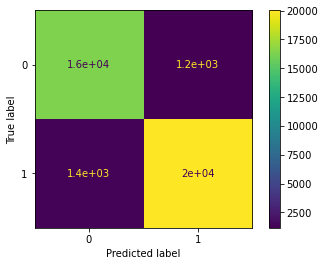

In [23]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)

### YOUR CODE HERE ###

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.

disp.plot()
### YOUR CODE HERE ###

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

[Write your response here. Double-click (or enter) to edit.]

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

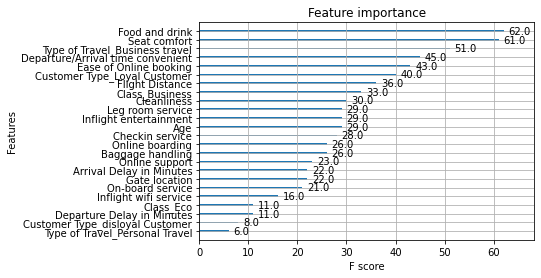

In [24]:
# Plot the relative feature importance of the predictor variables in your model.

### YOUR CODE HERE ###

plot_importance(xgb_cv.best_estimator_)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

[Write your response here. Double-click (or enter) to edit.]

### Compare models

Create a table of results to compare model performance.

In [ ]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

In [25]:
table = pd.DataFrame()
table = table.append({'Model': "Tuned Decision Tree",
                        'F1':  0.945422,
                        'Recall': 0.935863,
                        'Precision': 0.955197,
                        'Accuracy': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned Random Forest",
                        'F1':  0.947306,
                        'Recall': 0.944501,
                        'Precision': 0.950128,
                        'Accuracy': 0.942450
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Tuned XGBoost",
                        'F1':  f1_score,
                        'Recall': rc_score,
                        'Precision': pc_score,
                        'Accuracy': ac_score
                      },
                        ignore_index=True
                    )

table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.940124,0.935404,0.944893,0.934529


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and use the `append()` function to add the results of each model as a new row.

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

[Write your response here. Double-click (or enter) to edit.]

## Considerations

**What are some key takeaways you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**How would you share your findings with your team?**

[Write your response here. Double-click (or enter) to edit.]

**What would you share with and recommend to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged